In [1]:
import sys
sys.path.append('../wamuu')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from time import time

from instance import Instance
from solution import Solution
from sweep import best_sweep
from metaheuristics.variable_neighborhood_search import vns

First we choose an instance to work on

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

In [3]:
G = nx.Graph()
for i in range(I.n+1): G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')

In [4]:
def plot(sol=None):
    nx.draw_networkx_nodes(G, pos, nodelist=[0], node_color='#FFA726', node_size=80, node_shape='s')
    nx.draw_networkx_nodes(G, pos, nodelist=range(1, I.n+1), node_color='#BDBDBD', node_size=80)
    if sol != None:
        nx.draw_networkx_edges(G, pos,
                           edgelist=[[i, sol.node_up[i]] for i in range(1, I.n+1)],
                           edge_color=['#3E2723' if sol.node_power[i] <= I.max_cable_capacity else '#D50000' for i in range(1, I.n+1)],
                           width=[I.get_cable_index_from_node_power(sol.node_power[i])+1 for i in range(1, I.n+1)])
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.show()

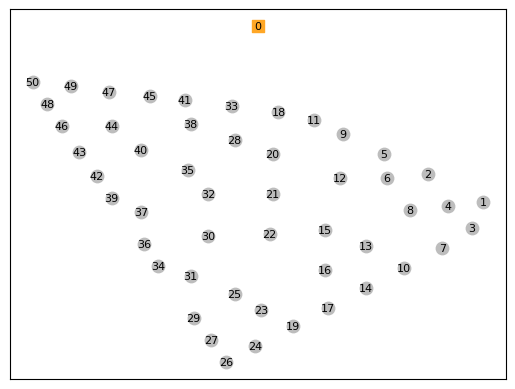

In [5]:
plot()

Let's see the best sweep with its cost

In [6]:
S0 = Solution(I, best_sweep(I))

Best sweep cost: 3.618e+07


/tmp/ipykernel_85971/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


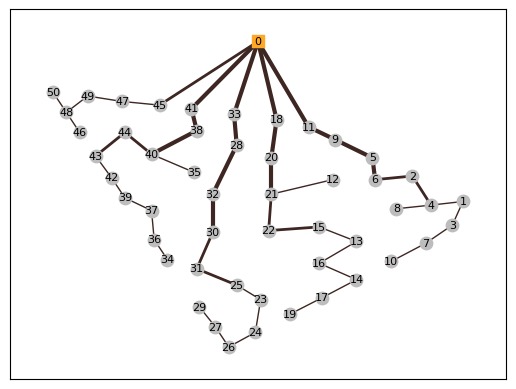

In [7]:
print(f'Best sweep cost: {S0.cost:.4}')
plot(S0)

Let's run the three Tabu Search options

In [8]:
VNS_1 = vns(I, Kmax=2, tl=10*60, seed=1)

In [9]:
VNS_2 = vns(I, Kmax=4, tl=10*60, seed=2)

In [10]:
VNS_3 = vns(I, Kmax=6, tl=10*60, seed=3)

In [11]:
print(f'Best sweep cost: {S0.cost:.4}')
print(f'VNS_1 cost: {VNS_1.cost:.4}')
print(f'VNS_2 cost: {VNS_2.cost:.4}')
print(f'VNS_3 cost: {VNS_3.cost:.4}')

Best sweep cost: 3.618e+07
VNS_1 cost: 3.551e+07
VNS_2 cost: 3.54e+07
VNS_3 cost: 3.557e+07


/tmp/ipykernel_85971/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


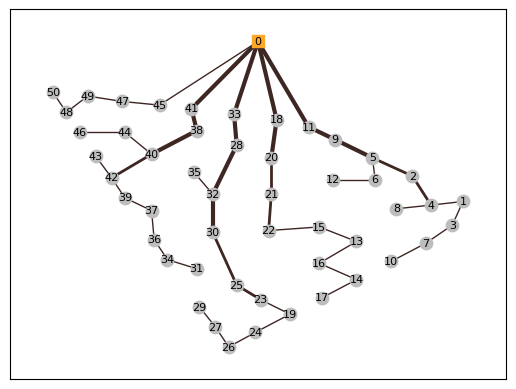

In [12]:
plot(VNS_1)

/tmp/ipykernel_85971/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


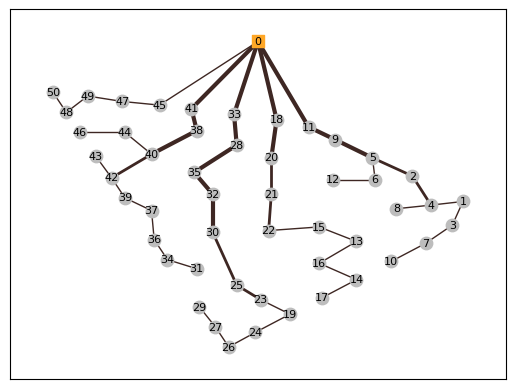

In [13]:
plot(VNS_2)

/tmp/ipykernel_85971/1540587156.py:5: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


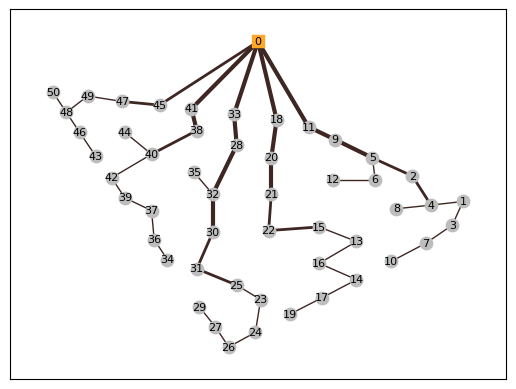

In [14]:
plot(VNS_3)